In [5]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from virtualscada.vs import removeRows
from virtualscada.vs import fillValuesMLPFInverse
import matplotlib.pyplot as plt

# Data Processing

First we add some data to our project. In order to use MLPowerflow, we need our data to only be missing information across some number of rows. In this sample we get rid of 30% of rows, removing a column in a given row with probability 50%. 

In [6]:
p = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_p.csv', header = None)
q = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_q.csv', header = None)
v = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_v.csv', header = None)
a = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_a.csv', header = None)

In [7]:
vRemoved = removeRows(v, .3, colPercentage = .5)
aRemoved = removeRows(a, .3, colPercentage = .5)

# Virtual SCADA

Then we fill in our missing values. Our code takes in the fixed real power, reactive power, voltage, and phase angle and fills in the missing values using an MLPowerflow model that it trains from that data. max_iter, C_set, eps_set are all parameters that are passed to the MLPowerflow model during its training. There's an accuracy-speed trade off here, a smaller list of values will give you a weaker model, but will take significantly less time to train.  

In [8]:
vFilled, aFilled = fillValuesMLPFInverse(p, q, vRemoved, aRemoved, max_iter = 1e4, C_set = [1,5,10], eps_set=[1e-5, 1e-3, 0.1])

Done training voltage model for bus  0 , with a total of  0  support vectors.
Done training voltage model for bus  1 , with a total of  0  support vectors.
Done training voltage model for bus  2 , with a total of  2533  support vectors.
Done training voltage model for bus  3 , with a total of  2425  support vectors.
Done training voltage model for bus  4 , with a total of  1474  support vectors.
Done training voltage model for bus  5 , with a total of  1814  support vectors.
Done training voltage model for bus  6 , with a total of  1807  support vectors.
Done training voltage model for bus  7 , with a total of  1836  support vectors.
Done training voltage model for bus  8 , with a total of  1585  support vectors.
Done training voltage model for bus  9 , with a total of  1965  support vectors.
Done training voltage model for bus  10 , with a total of  1585  support vectors.
Done training voltage model for bus  11 , with a total of  1579  support vectors.
Done training voltage model for 

# Results

Now we look at the results of our filling. The following code manually computes the RMSE of our fill by comparing it with the values we removed at the first step.

In [9]:
numRows, numCols = v.shape
predictions = []
actuals = []
for i in range(numCols):
    for j in range(numRows):
        if np.isnan(vRemoved[i][j]):
            predictions.append(vFilled[i][j])
            actuals.append(v[i][j])
                
print(np.sqrt(np.nanmean((np.array(predictions)-np.array(actuals))**2)))

0.08284205323230327


Here is a plot of the results. The first plot is the actual voltage, the second is the voltage after being filled, and the third plot is the plot of the voltage with the missing values.

Text(0, 0.5, 'Voltage Magnitude')

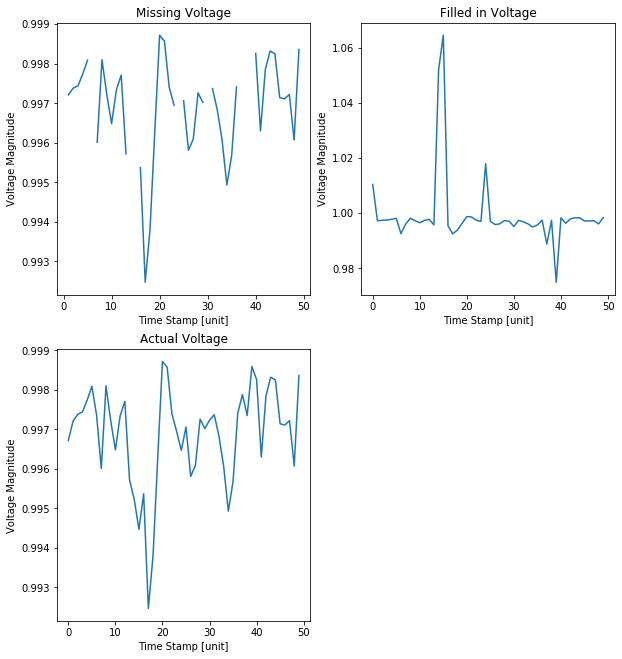

In [10]:
sampleBus = np.random.randint(0,29)

plt.figure(figsize=(10, 11))
plt.subplot(221)
plt.plot(vRemoved[sampleBus][0:50])
plt.title('Missing Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(222)
plt.plot(vFilled[sampleBus][0:50])
plt.title('Filled in Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(223)
plt.plot(v[sampleBus][0:50])
plt.title('Actual Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')